## Simulation and Modeling Techniques
## Final Project: The Money Fight Simulation


### Background

Floyd Mayweather Jr. vs. Conor McGregor, also known as "The Money Fight" and "The Biggest Fight in Combat Sports History",was a professional boxing match between undefeated eleven-time five-division boxing world champion Floyd Mayweather Jr. and two-division mixed martial arts (MMA) world champion and, at the time, UFC Lightweight Champion Conor McGregor.
My work here will be to simulate that fight using different techniques learned in this class.

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sympy
import pint
UNITS = pint.UnitRegistry()
import modsim
from modsim import*

In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

Set the seed

In [3]:
np.random.seed(1412)

### State Objects

Different metrics used here are thrown, landed, Kd (knockdown), ko (knockout), and score

In [4]:
mayweather = State(thrown = 0, landed = 0, kd = 0, ko = 0, score = 0)
mcgregor = State(thrown = 0, landed = 0, kd = 0, ko = 0, score = 0)

thrown    0
landed    0
kd        0
ko        0
score     0
Name: state, dtype: int64

### Step function

This function simulates an instance of a round for both fighters. mw will represent Mayweather and mg McGregor

In [5]:
def step(system):
    
    # Mayweather throwing or landing a punch:
    if flip(system.mw_throw): 
        mayweather.thrown += 1 
        if flip(system.mw_land): 
            mayweather.landed += 1 
            
    # McGregor throwing or landing a punch:
    
    if flip(system.mg_throw):
        mcgregor.thrown += 1
        if flip(system.mg_land): 
            mcgregor.landed += 1


### System

We are going to define different parameters for the system

In [6]:
system = System(mw_throw = 0.23, mw_land = 0.47, mg_throw = 0.27, mg_land = 0.31)

namespace(mw_throw=0.23, mw_land=0.47, mg_throw=0.27, mg_land=0.31)

### Reset function

This function will reset the state object

In [7]:
def reset(state):
    
    state.thrown = 0
    state.landed = 0
    state.kd = 0
    state.score = 0
    state.ko = 0

### Round simulation

This function will simulate a round

In [8]:
ns = 180 # number of second for a round

def round_sim(system):
    
    for i in range(ns): 
        step(system)
        
    if mayweather.landed > mcgregor.landed:
        mayweather.score += 10
        mcgregor.score += 9
    elif mcgregor.landed > mayweather.landed:
        mayweather.score += 9
        mcgregor.score += 10
    else:
        mayweather.score += 10
        mcgregor.score += 10

### All rounds simulation

We will modified the round_sim function to be able to simulate all the rounds rather than only one.
Therefore, we will introduce new object(init) and new functions to help us to do so.

In [9]:
init = State(mw_thrown = 0,
             mw_landed = 0,
             mw_kd = 0,
             mg_thrown = 0,
             mg_landed = 0,
             mg_kd = 0)

system = System(init = init,
                mw_throw = 0.23,
                mw_land = 0.47,
                mg_throw = 0.27,
                mg_land = 0.31)

def reset_state_modified():
    system.init = State(mw_thrown = 0,
             mw_landed = 0,
             mw_kd = 0,
             mg_thrown = 0,
             mg_landed = 0,
             mg_kd = 0)

def step(system):

    # Mayweather
    
    if flip(system.mw_throw): 
        system.init.mw_thrown += 1 
        if flip(system.mw_land): 
            system.init.mw_landed += 1 
  
    # McGregor
    
    if flip(system.mg_throw): 
        system.init.mg_thrown += 1 
        if flip(system.mg_land): 
            system.init.mg_landed += 1

            
def round_sim(system):
   
    
    reset_state_modified
    ns = 180
    for i in range(ns): 
        step(system)
        
    if system.init.mw_landed > system.init.mg_landed:
        mayweather.score += 10
        mcgregor.score += 9
    elif system.init.mg_landed > system.init.mw_landed:
        mayweather.score += 9
        mcgregor.score += 10
    else:
        mayweather.score += 10
        mcgregor.score += 10
        
    mayweather.thrown += system.init.mw_thrown 
    mayweather.landed += system.init.mw_landed
    mayweather.kd += system.init.mw_kd
    mcgregor.thrown += system.init.mg_thrown
    mcgregor.landed += system.init.mg_landed
    mcgregor.kd += system.init.mg_kd

### Total fight simulation

In [10]:
def fight_sim(system, n_rounds):
    
    mayweather_results = []
    mcgregor_results = []
    Round = []
    mw_throw = []
    mw_land = []
    mg_throw = []
    mg_land = []
    
    reset(mayweather)
    reset(mcgregor)
    
    
    for n in linspace(1, n_rounds, n_rounds):
        round_sim(system)
        Round.append(int(n))
        mw_throw.append(system.init.mw_thrown)
        mw_land.append(system.init.mw_landed)
        mg_throw.append(system.init.mg_thrown)
        mg_land.append(system.init.mg_landed)
        mayweather_results.append(mayweather.score)
        mcgregor_results.append(mcgregor.score)
        
    d = {'Mayweather': mayweather_results,
         'McGregor': mcgregor_results,
         'Mayweather_Thrown': mw_throw,
         'McGregor_Thrown': mg_throw,
         'Mayweather_Landed': mw_land,
         'McGregor_Landed': mg_land}
    results = pd.DataFrame(data=d, index= Round)
    return results

fight_sim(system, 12)

,Mayweather,McGregor,Mayweather_Thrown,McGregor_Thrown,Mayweather_Landed,McGregor_Landed
1,10,9,34,50,15,14
2,20,18,74,98,38,30
3,30,27,113,144,54,45
4,40,36,156,201,73,68
5,50,45,185,246,86,83
6,60,54,224,300,107,101
7,70,63,269,354,127,109
8,80,72,298,400,138,122
9,90,81,327,443,156,134
10,100,90,379,496,183,149


Adding kd and ko to modified the previous fight_sim simulation...

In [11]:
def ko(fighter):
    
    print("{fighter} wins by K.O.".format(fighter = fighter))

In [12]:
def step(system):
    
    
    if flip(system.mw_throw): 
        system.init.mw_thrown += 1 
        mayweather.thrown += 1
        
        if flip(system.mw_land): 
            system.init.mw_landed += 1 
            mayweather.landed += 1 
            
            if flip(system.mw_kd): 
                system.init.mw_kd += 1 
                mayweather.kd += 1 
                
                if flip(system.mw_ko):   
                    mayweather.ko += 1
                    ko("Mayweather")
                    return True
                
  
    if flip(system.mg_throw): 
        system.init.mg_thrown += 1 
        mcgregor.thrown += 1 
        
        if flip(system.mg_land): 
            system.init.mg_landed += 1 
            mcgregor.landed += 1 
            
            if flip(system.mg_kd): 
                system.init.mg_kd += 1
                mcgregor.kd += 1
                
                if flip(system.mg_ko):   
                    mcgregor.ko += 1
                    ko("McGregor")
                    return True
                
            
def round_sim(system):
  
    ns = 180
    reset_state_modified() 
    
    for i in range(ns): 
        res = step(system)
        if res == True:
              return res
              break
    if system.init.mw_kd > system.init.mg_kd: 
        mayweather.score += 10
        mcgregor.score += 9 - system.init.mw_kd  
    elif system.init.mw_kd < system.init.mg_kd: 
        mayweather.score += 9 - system.init.mg_kd
        mcgregor.score += 10
    elif system.init.mw_landed > system.init.mg_landed: 
        mayweather.score += 10
        mcgregor.score += 9 - system.init.mw_kd
    elif system.init.mg_landed > system.init.mw_landed:
        mayweather.score += 9 - system.init.mg_kd
        mcgregor.score += 10
    else:
        mayweather.score += 10
        mcgregor.score += 10
   


In [13]:
def fight_sim(system, n_rounds):
   
    mayweather_results = []
    mcgregor_results = []
    Round = []
    mw_throw = []
    mw_land = []
    mw_kd = []
    mg_throw = []
    mg_land = []
    mg_kd = []
    
  
    reset(mayweather)
    reset(mcgregor)
    
    
    for n in linspace(1,n_rounds, n_rounds):
        res = round_sim(system)
        Round.append(int(n))
        mw_throw.append(system.init.mw_thrown)
        mw_land.append(system.init.mw_landed)
        mg_throw.append(system.init.mg_thrown)
        mg_land.append(system.init.mg_landed)
        mw_kd.append(system.init.mw_kd)
        mg_kd.append(system.init.mg_kd)
        mayweather_results.append(mayweather.score)
        mcgregor_results.append(mcgregor.score)
        if res == True:
            break
    d = {'Mayweather': mayweather_results,
         'McGregor': mcgregor_results,
         'Mayweather_Thrown': mw_throw,
         'McGregor_Thrown': mg_throw,
         'Mayweather_Landed': mw_land,
         'McGregor_Landed': mg_land,
         'Mayweather_KD': mw_kd,    
         'McGregor_KD': mg_kd}
    
    results = pd.DataFrame(data=d, index= Round)
    return results


### Test the results

In [14]:
system = System(init = init,  
                mw_throw = 0.23,
                mw_land = 0.15,
                mw_kd = 0.05, 
                mw_ko = 0.42,  
                mg_throw = 0.27,
                mg_land = 0.31,
                mg_kd = 0.07,   
                mg_ko = 0.39)

fight_sim(system, 12)

Mayweather wins by K.O.


,Mayweather,McGregor,Mayweather_Thrown,McGregor_Thrown,Mayweather_Landed,McGregor_Landed,Mayweather_KD,McGregor_KD
1,0,0,14,12,2,4,1,0


### Validation

It is time to tweak some parameters...

We will define run_simulation function in which we will calculate the victory margin.

McGregor wins by K.O.
Mayweather wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
Mayweather wins by K.O.
Mayweather wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
Mayweather wins by K.O.
Mayweather wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
Mayweather wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
Mayweather wins by K.O.
Mayweather wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
Mayweather wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
Mayweather wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
Mayweather wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
McGregor w

mayweather_dec     3
mayweather_KO      8
mcgregor_dec      21
mcgregor_KO       18
Draw               0
Name: state, dtype: int64

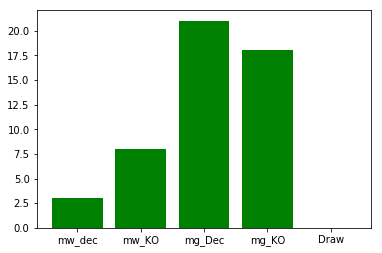

In [15]:
def run_simulation(system, n_rounds, n_runs):
    
    results = State(mayweather_dec = 0,
                    mayweather_KO = 0,
                    mcgregor_dec = 0,
                    mcgregor_KO = 0,
                    Draw = 0)
    
    mw_margin, mg_margin = [],[] 
    
    labels = ['mw_dec', 'mw_KO', 'mg_Dec', 'mg_KO', 'Draw']
    
    for run in range(n_runs):
        fight_sim(system, n_rounds)
        if mayweather.score > mcgregor.score:
            results.mayweather_dec += 1
            x= int(mayweather.score - mcgregor.score)
            mw_margin.append(x)
            
        elif mayweather.score < mcgregor.score:
            results.mcgregor_dec += 1
            y= int(mcgregor.score - mayweather.score)
            mg_margin.append(y)
            
        elif mayweather.ko == 1:
            results.mayweather_KO += 1
            
        elif mcgregor.ko == 1:
            results.mcgregor_KO += 1
            
        elif mayweather.score == mcgregor.score:
            results.Draw += 1
            
    plt.bar(labels, results, color='green')
    print("In decisions, Mayweather averages margin victory of:", round(np.mean(mw_margin), 4))
    print("In decisions, McGregor averages margin victory of:", round(np.mean(mg_margin), 4))
    return results

run_simulation(system, 12, 50)

### Forecasting/Findings

Now that we can simulate the fight, we are going to use each fighters stat and predict the winner and details on the fight.

Mayweather wins by K.O.
Mayweather wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
Mayweather wins by K.O.
Mayweather wins by K.O.
McGregor wins by K.O.
Mayweather wins by K.O.
Mayweather wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
Mayweather wins by K.O.
McGregor wins by K.O.
Mayweather wins by K.O.
McGregor wins by K.O.
Mayweather wins by K.O.
Mayweather wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
Mayweather wins by K.O.
McGregor wins by K.O.
McGregor wins by K.O.
In decisions, Mayweather averages margin victory of: 3.0
In decisions, McGregor averages margin victory of: 3.04


mayweather_dec    17
mayweather_KO      2
mcgregor_dec      25
mcgregor_KO        2
Draw               4
Name: state, dtype: int64

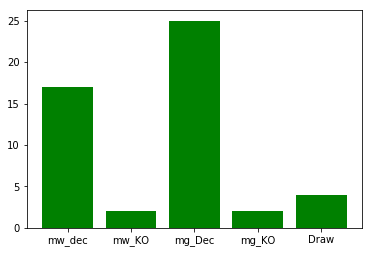

In [16]:
system = System(init = init,  
                mw_throw = 0.21666,
                mw_land = 0.364,
                mw_kd = 0.008,  
                mw_ko = 0.30,  
                mg_throw = 0.28236,
                mg_land = 0.280,
                mg_kd = 0.011,   
                mg_ko = 0.27)

run_simulation(system, 12, 50)

Testing my model shows that Mayweather won by KO but after tweaking some parameters, we can see that the average margin victory of McGregor is higher compared to Mayweather. This explains a bit to me why so many thought that Mcgregor could have won this fight. There's many other factors that needed to be taken into consideration while simulating human being situations. Things such as the mood on a particular day, the emotion,... can influence the outcome of real situation which could be different fro the simulation by the fact those things (emotion, feelins...) can't be put in numbers.